# Van der Pol oscillator

![van-der-pol](../pics/van-der-pol.png)
$\left\{
\begin{array}{l}
\dot{x}=v
\\
\dot{v}= \mu (1-x^2)v - x + A \sin(\omega t)
\end{array}
\right.
$

In [6]:
# this makes sure it starts looking for things from the top folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects


In [2]:
from ode_helpers import *

In [3]:
def f(t, y, c):
    ydot = [y[1], 
            c[0]*(1-y[0]**2)*y[1] - y[0] + c[1]*np.sin(c[2]*t)]
    return ydot
            
def dx_dt(x, y):
    return f(0, (x, y), c)[0]
    
def dy_dt(x, y):
    return f(0, (x, y), c)[1]

mu = 8.53
A = 1.2
omega = 2*np.pi/10
c = [mu, A, omega]

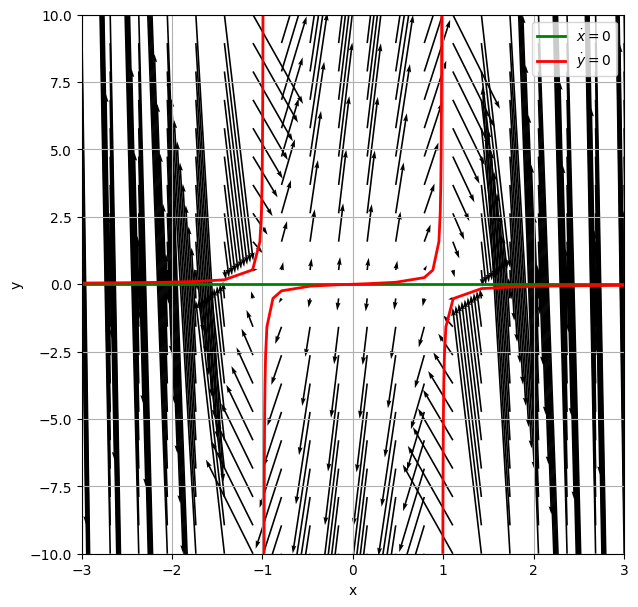

In [4]:
plot_phase_plane(dx_dt,
                 dy_dt,
                 x_range=(-3, 3),
                 y_range=(-10, 10),
                 density=20,
                 scale=10
                 # %trajectories=[(2, 0), (-2, 1), (0, -2)]
                 )

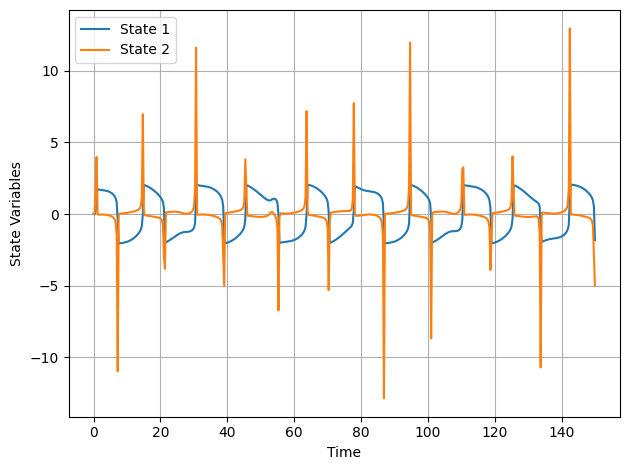

In [5]:
tspan = np.linspace(0, 150, 500)
yinit = [0, 0]
sol = solve_ivp(lambda t,
                y: f(t, y, c),
                [tspan[0], tspan[-1]],
                yinit,
                t_eval=tspan,
                rtol = 1e-5)

state_plotter(sol.t, sol.y)